# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.
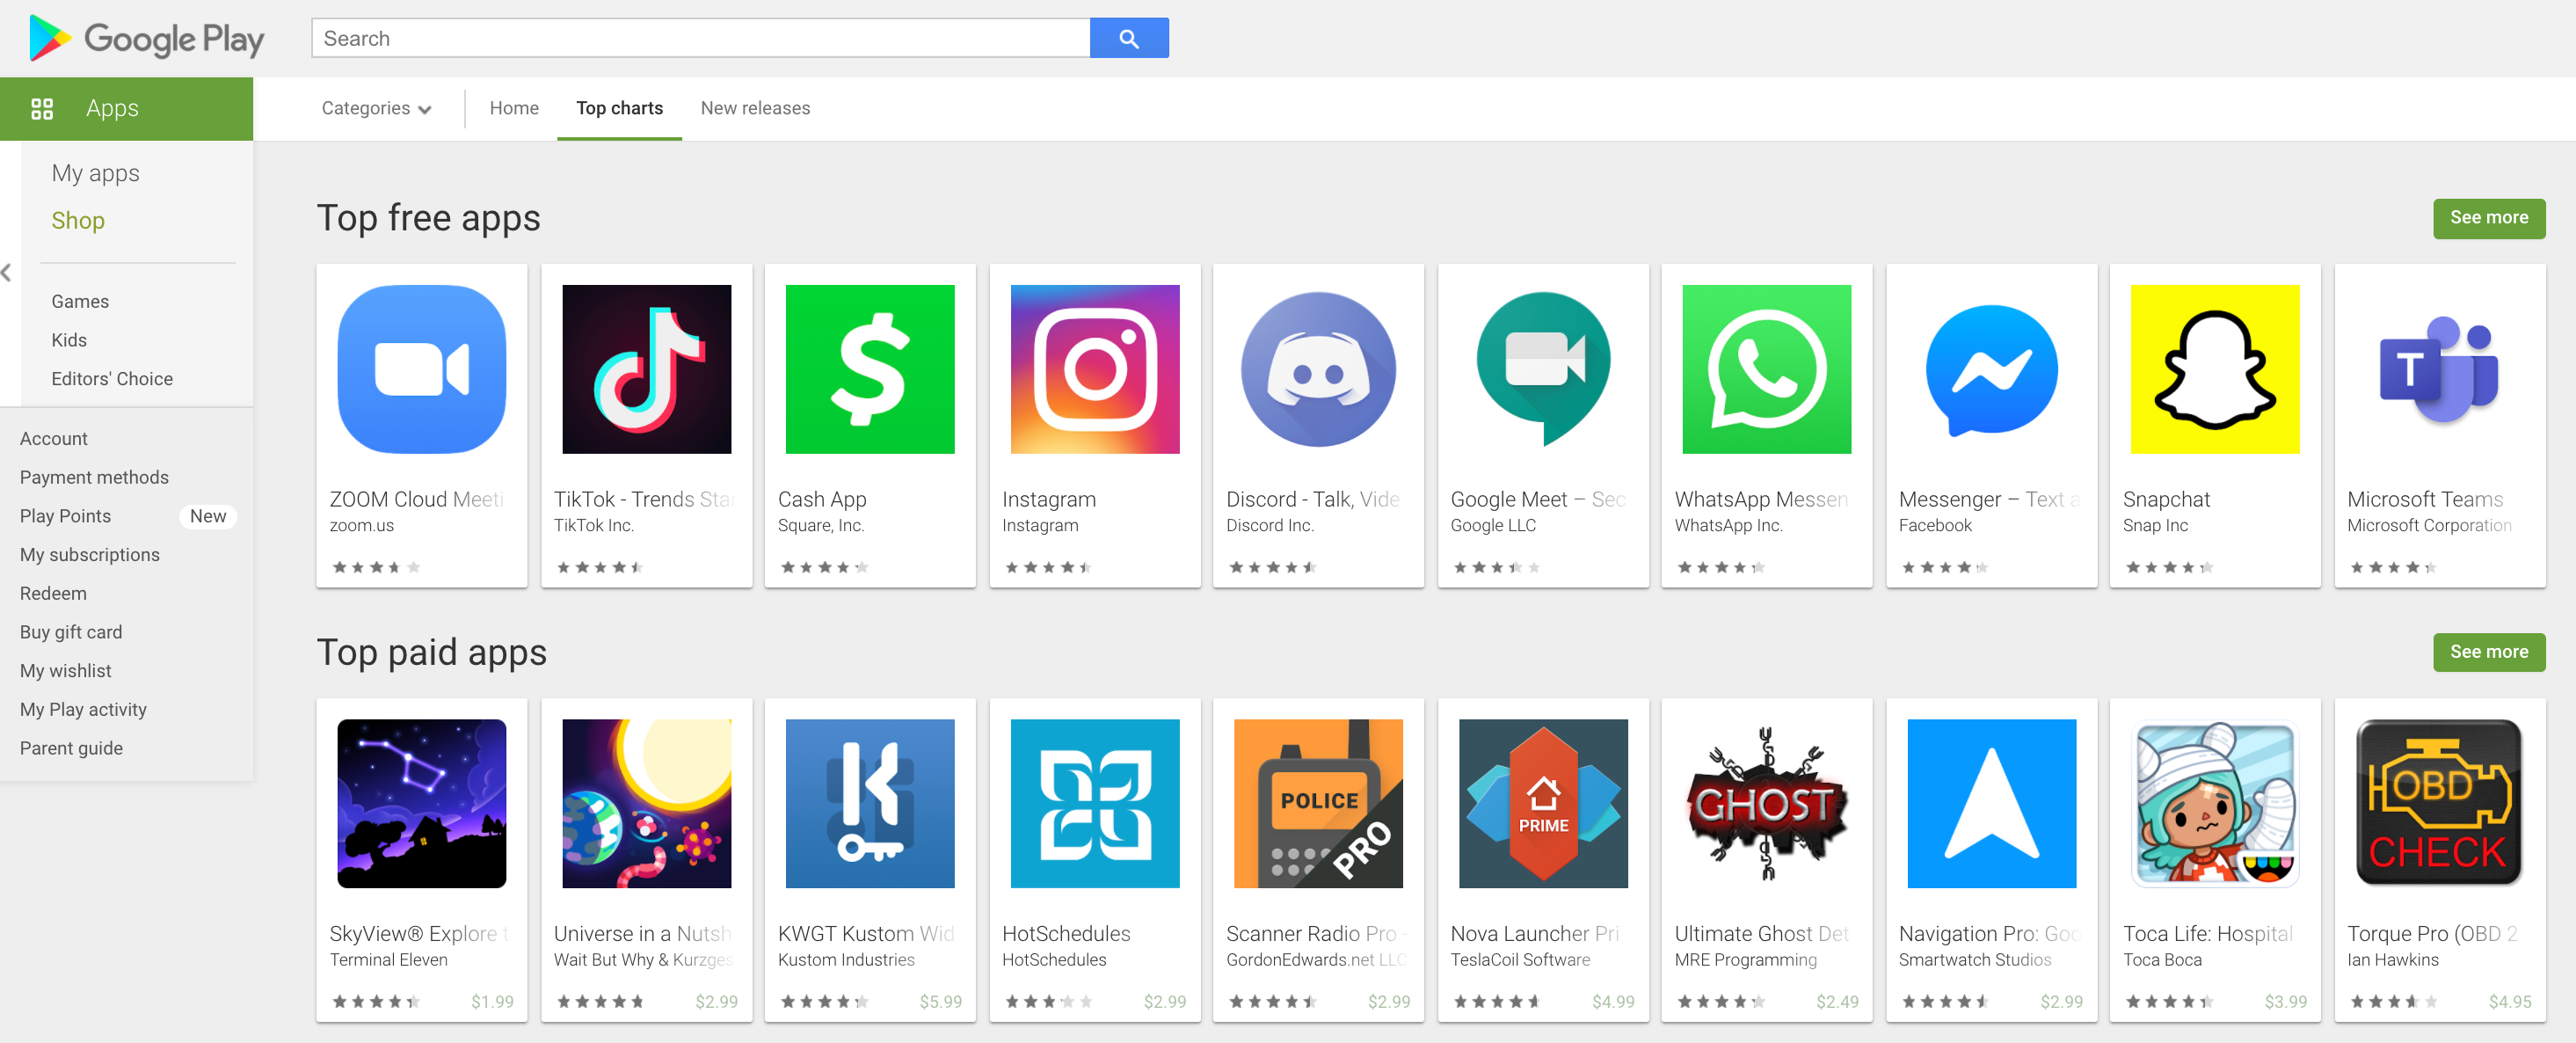

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

# Notebook Presentation

In [2]:

pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

In [4]:
df_apps.shape

(10841, 12)

In [5]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

**The .sample(n) method will give us n random rows. This is another handy way to inspect our DataFrame.**

In [6]:
df_apps.sample(5)

App             Category  \
4954                     Offline Jízdní řády CG Transit  MAPS_AND_NAVIGATION   
3363                                 Adult Dirty Emojis               DATING   
2915  Mind Map AR, Augmented Reality ARCore Mind Map...         PRODUCTIVITY   
7295                              Little Lovely Dentist               FAMILY   
2621                                         CW Deposit             BUSINESS   

      Rating  Reviews  Size_MBs   Installs  Type Price Content_Rating  \
4954    4.60     7314      7.00    100,000  Free     0       Everyone   
3363    2.80       80      5.50     10,000  Free     0           Teen   
2915    4.20       29     35.00      5,000  Free     0       Everyone   
7295    4.20    17786     16.00  1,000,000  Free     0       Everyone   
2621    3.00        4      0.49      1,000  Free     0       Everyone   

                 Genres       Last_Updated   Android_Ver  
4954  Maps & Navigation  September 7, 2017    4.0 and up  
3363             Dating   November 6, 2017  4.0.3 and up  
2915       Productivity      July 26, 2018    7.0 and up  
7295             Casual       May 14, 2018    4.0 and up  
2621           Business   February 6, 2014    2.1 and up

### Drop Unused Columns

 Removing the columns called `Last_Updated` and `Android_Version` from the DataFrame. As they are not useful

In [7]:
df_apps.drop(['Last_Updated','Android_Ver'], axis=1, inplace=True)


In [8]:
df_apps.head()

App         Category  Rating  \
0                       Ak Parti Yardım Toplama           SOCIAL     NaN   
1                    Ain Arabic Kids Alif Ba ta           FAMILY     NaN   
2  Popsicle Launcher for Android P 9.0 launcher  PERSONALIZATION     NaN   
3                     Command & Conquer: Rivals           FAMILY     NaN   
4                                    CX Network         BUSINESS     NaN   

   Reviews  Size_MBs Installs  Type   Price Content_Rating           Genres  
0        0      8.70        0  Paid  $13.99           Teen           Social  
1        0     33.00        0  Paid   $2.99       Everyone        Education  
2        0      5.50        0  Paid   $1.49       Everyone  Personalization  
3        0     19.00        0   NaN       0   Everyone 10+         Strategy  
4        0     10.00        0  Free       0       Everyone         Business

### Find and Remove NaN values in Ratings



In [9]:
df_apps.isna()

App  Category  Rating  Reviews  Size_MBs  Installs   Type  Price  \
0      False     False    True    False     False     False  False  False   
1      False     False    True    False     False     False  False  False   
2      False     False    True    False     False     False  False  False   
3      False     False    True    False     False     False   True  False   
4      False     False    True    False     False     False  False  False   
...      ...       ...     ...      ...       ...       ...    ...    ...   
10836  False     False   False    False     False     False  False  False   
10837  False     False   False    False     False     False  False  False   
10838  False     False   False    False     False     False  False  False   
10839  False     False   False    False     False     False  False  False   
10840  False     False   False    False     False     False  False  False   

       Content_Rating  Genres  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
10836           False   False  
10837           False   False  
10838           False   False  
10839           False   False  
10840           False   False  

[10841 rows x 10 columns]

In [10]:
df_apps_clean = df_apps.dropna()

In [11]:
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates




In [12]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


App Category  Rating  Reviews  \
946                       420 BZ Budeze Delivery  MEDICAL    5.00        2   
1133                                 MouseMingle   DATING    2.70        3   
1196  Cardiac diagnosis (heart rate, arrhythmia)  MEDICAL    4.40        8   
1231                                Sway Medical  MEDICAL    5.00        3   
1247              Chat Kids - Chat Room For Kids   DATING    4.70        6   

      Size_MBs Installs  Type   Price Content_Rating   Genres  
946      11.00      100  Free       0     Mature 17+  Medical  
1133      3.90      100  Free       0     Mature 17+   Dating  
1196      6.50      100  Paid  $12.99       Everyone  Medical  
1231     22.00      100  Free       0       Everyone  Medical  
1247      4.90      100  Free       0     Mature 17+   Dating

In [13]:
df_apps_clean[df_apps_clean.App == 'Instagram']

App Category  Rating   Reviews  Size_MBs       Installs  Type  \
10806  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   
10808  Instagram   SOCIAL    4.50  66577446      5.30  1,000,000,000  Free   
10809  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   
10810  Instagram   SOCIAL    4.50  66509917      5.30  1,000,000,000  Free   

      Price Content_Rating  Genres  
10806     0           Teen  Social  
10808     0           Teen  Social  
10809     0           Teen  Social  
10810     0           Teen  Social

In [14]:
df_apps_clean = df_apps_clean.drop_duplicates(subset = ['App', 'Type','Price'])

In [15]:
df_apps_clean[df_apps_clean.App == 'Instagram']

App Category  Rating   Reviews  Size_MBs       Installs  Type  \
10806  Instagram   SOCIAL    4.50  66577313      5.30  1,000,000,000  Free   

      Price Content_Rating  Genres  
10806     0           Teen  Social

In [16]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps



In [17]:
df_apps_clean.sort_values('Rating', ascending=False).head()

App     Category  Rating  Reviews  Size_MBs Installs  \
21    KBA-EZ Health Guide      MEDICAL    5.00        4     25.00        1   
1230         Sway Medical      MEDICAL    5.00        3     22.00      100   
1227    AJ Men's Grooming    LIFESTYLE    5.00        2     22.00      100   
1224       FK Dedinje BGD       SPORTS    5.00       36      2.60      100   
1223      CB VIDEO VISION  PHOTOGRAPHY    5.00       13      2.60      100   

      Type Price Content_Rating       Genres  
21    Free     0       Everyone      Medical  
1230  Free     0       Everyone      Medical  
1227  Free     0       Everyone    Lifestyle  
1224  Free     0       Everyone       Sports  
1223  Free     0       Everyone  Photography

# Find 5 Largest Apps in terms of Size (MBs)



In [18]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

App            Category  Rating  Reviews  \
9942   Talking Babsy Baby: Baby Games           LIFESTYLE    4.00   140995   
10687          Hungry Shark Evolution                GAME    4.50  6074334   
9943            Miami crime simulator                GAME    4.00   254518   
9944     Gangster Town: Vice District              FAMILY    4.30    65146   
3144                       Vi Trainer  HEALTH_AND_FITNESS    3.60      124   

       Size_MBs     Installs  Type Price Content_Rating  \
9942     100.00   10,000,000  Free     0       Everyone   
10687    100.00  100,000,000  Free     0           Teen   
9943     100.00   10,000,000  Free     0     Mature 17+   
9944     100.00   10,000,000  Free     0     Mature 17+   
3144     100.00        5,000  Free     0       Everyone   

                       Genres  
9942   Lifestyle;Pretend Play  
10687                  Arcade  
9943                   Action  
9944               Simulation  
3144         Health & Fitness

# Find the 5 App with Most Reviews



In [19]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

App            Category  \
10805                                           Facebook              SOCIAL   
10785                                 WhatsApp Messenger       COMMUNICATION   
10806                                          Instagram              SOCIAL   
10784           Messenger – Text and Video Chat for Free       COMMUNICATION   
10650                                     Clash of Clans                GAME   
10744            Clean Master- Space Cleaner & Antivirus               TOOLS   
10835                                     Subway Surfers                GAME   
10828                                            YouTube       VIDEO_PLAYERS   
10746  Security Master - Antivirus, VPN, AppLock, Boo...               TOOLS   
10584                                       Clash Royale                GAME   
10763                                   Candy Crush Saga                GAME   
10770        UC Browser - Fast Download Private & Secure       COMMUNICATION   
10735                                           Snapchat              SOCIAL   
10489    360 Security - Free Antivirus, Booster, Cleaner               TOOLS   
10731                                     My Talking Tom                GAME   
10594                                        8 Ball Pool                GAME   
10302  DU Battery Saver - Battery Charger & Battery Life               TOOLS   
10354                        BBM - Free Calls & Messages       COMMUNICATION   
10549  Cache Cleaner-DU Speed Booster (booster & clea...               TOOLS   
10757                                            Twitter  NEWS_AND_MAGAZINES   
10721                                    Viber Messenger       COMMUNICATION   
10578                                     Shadow Fight 2                GAME   
10813                                      Google Photos         PHOTOGRAPHY   
10724                        LINE: Free Calls & Messages       COMMUNICATION   
10717                                                Pou                GAME   
10792                      Skype - free IM & video calls       COMMUNICATION   
10628                                         Pokémon GO                GAME   
10388           Minion Rush: Despicable Me Official Game                GAME   
10694                                            Yes day                GAME   
10695                                            Hay Day              FAMILY   
10644                           Dream League Soccer 2018                GAME   
10696                                  My Talking Angela                GAME   
10660             VivaVideo - Video Editor & Photo Movie       VIDEO_PLAYERS   
10786                       Google Chrome: Fast & Secure       COMMUNICATION   
10817                          Maps - Navigate & Explore    TRAVEL_AND_LOCAL   
10672                                  Hill Climb Racing                GAME   
10734                                      Facebook Lite              SOCIAL   
10649                                Asphalt 8: Airborne                GAME   
10699                          Mobile Legends: Bang Bang                GAME   
10322  Battery Doctor-Battery Life Saver & Battery Co...               TOOLS   
10396                                     Piano Tiles 2™                GAME   
10777                                       Temple Run 2                GAME   
10822                                             Google               TOOLS   
10359  Truecaller: Caller ID, SMS spam blocking & Dialer       COMMUNICATION   
10711                         SHAREit - Transfer & Share               TOOLS   
10389   Sniper 3D Gun Shooter: Free Shooting Games - FPS                GAME   
10676                                   Farm Heroes Saga                GAME   
10576   PicsArt Photo Studio: Collage Maker & Pic Editor         PHOTOGRAPHY   
10461  PhotoGrid: Video & Pic Collage Maker, Photo Ed...         PHOTOGRAPHY   
10502   GO Launcher - 3D parallax Themes & HD Wallpap

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [20]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

**To create a pie chart we simply call px.pie() and then .show() the resulting figure. Plotly refers to all their figures, be they line charts, bar charts, or pie charts as graph_objects.**



In [21]:
px.pie(labels = ratings.index, values = ratings.values)


If you’d like to configure other aspects of the chart, that you can’t see in the list of parameters, you can call a method called .update_traces(). In plotly lingo, “traces” refer to graphical marks on a figure. Think of “traces” as collections of attributes. Here we update the traces to change how the text is displayed.

In [22]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

**To create a donut  chart, we can simply add a value for the hole argument:**

In [23]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

 How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [24]:
df_apps_clean.Installs.describe

<bound method NDFrame.describe of 21                   1
28                   1
47                   1
82                   5
99                   5
             ...      
10824    1,000,000,000
10828    1,000,000,000
10829    1,000,000,000
10831    1,000,000,000
10835    1,000,000,000
Name: Installs, Length: 8199, dtype: object>

In [25]:
df_apps_clean.info

<bound method DataFrame.info of                                                    App            Category  \
21                                 KBA-EZ Health Guide             MEDICAL   
28                                            Ra Ga Ba                GAME   
47                                             Mu.F.O.                GAME   
82                                    Brick Breaker BR                GAME   
99     Anatomy & Physiology Vocabulary Exam Review App             MEDICAL   
...                                                ...                 ...   
10824                                     Google Drive        PRODUCTIVITY   
10828                                          YouTube       VIDEO_PLAYERS   
10829                          Google Play Movies & TV       VIDEO_PLAYERS   
10831                                      Google News  NEWS_AND_MAGAZINES   
10835                                   Subway Surfers                GAME   

       Rating   Reviews  Size_M

In [26]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")

In [27]:
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

App
Installs        
1              3
5              9
10            69
50            56
100          303
500          199
1000         698
5000         425
10000        988
50000        457
100000      1096
500000       504
1000000     1417
5000000      607
10000000     933
50000000     202
100000000    189
500000000     24
1000000000    20

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate



In [28]:
df_apps_clean.Price.describe

<bound method NDFrame.describe of 21           0
28       $1.49
47       $0.99
82           0
99           0
         ...  
10824        0
10828        0
10829        0
10831        0
10835        0
Name: Price, Length: 8199, dtype: object>

In [29]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
 
df_apps_clean.sort_values('Price', ascending=False).head(20)

App   Category  Rating  Reviews  Size_MBs  \
3946        I'm Rich - Trump Edition  LIFESTYLE    3.60      275      7.30   
2461              I AM RICH PRO PLUS    FINANCE    4.00       36     41.00   
4606               I Am Rich Premium    FINANCE    4.10     1867      4.70   
3145              I am rich(premium)    FINANCE    3.50      472      0.94   
3554                      💎 I'm rich  LIFESTYLE    3.80      718     26.00   
5765                       I am rich  LIFESTYLE    3.80     3547      1.80   
1946  I am rich (Most expensive app)    FINANCE    4.10      129      2.70   
2775                   I Am Rich Pro     FAMILY    4.40      201      2.70   
3221                  I am Rich Plus     FAMILY    4.00      856      8.70   
3114                       I am Rich    FINANCE    4.30      180      3.80   
1331          most expensive app (H)     FAMILY    4.30        6      1.50   
2394                      I am Rich!    FINANCE    3.80       93     22.00   
3897                       I Am Rich     FAMILY    3.60      217      4.90   
2193             I am extremely Rich  LIFESTYLE    2.90       41      2.90   
3856                   I am rich VIP  LIFESTYLE    3.80      411      2.60   
2281       Vargo Anesthesia Mega App    MEDICAL    4.60       92     32.00   
1407                    LTC AS Legal    MEDICAL    4.00        6      1.30   
2629                I am Rich Person  LIFESTYLE    4.20      134      1.80   
2481         A Manual of Acupuncture    MEDICAL    3.50      214     68.00   
4264         Golfshot Plus: Golf GPS     SPORTS    4.10     3387     25.00   

      Installs  Type  Price Content_Rating         Genres  
3946     10000  Paid 400.00       Everyone      Lifestyle  
2461      1000  Paid 399.99       Everyone        Finance  
4606     50000  Paid 399.99       Everyone        Finance  
3145      5000  Paid 399.99       Everyone        Finance  
3554     10000  Paid 399.99       Everyone      Lifestyle  
5765    100000  Paid 399.99       Everyone      Lifestyle  
1946      1000  Paid 399.99           Teen        Finance  
2775      5000  Paid 399.99       Everyone  Entertainment  
3221     10000  Paid 399.99       Everyone  Entertainment  
3114      5000  Paid 399.99       Everyone        Finance  
1331       100  Paid 399.99       Everyone  Entertainment  
2394      1000  Paid 399.99       Everyone        Finance  
3897     10000  Paid 389.99       Everyone  Entertainment  
2193      1000  Paid 379.99       Everyone      Lifestyle  
3856     10000  Paid 299.99       Everyone      Lifestyle  
2281      1000  Paid  79.99       Everyone        Medical  
1407       100  Paid  39.99       Everyone        Medical  
2629      1000  Paid  37.99       Everyone      Lifestyle  
2481      1000  Paid  33.99       Everyone        Medical  
4264     50000  Paid  29.99       Everyone         Sports

### The most expensive apps sub $250

In [30]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

App   Category  Rating  Reviews  Size_MBs  \
2281  Vargo Anesthesia Mega App    MEDICAL    4.60       92     32.00   
1407               LTC AS Legal    MEDICAL    4.00        6      1.30   
2629           I am Rich Person  LIFESTYLE    4.20      134      1.80   
2481    A Manual of Acupuncture    MEDICAL    3.50      214     68.00   
2463         PTA Content Master    MEDICAL    4.20       64     41.00   

      Installs  Type  Price Content_Rating     Genres  
2281      1000  Paid  79.99       Everyone    Medical  
1407       100  Paid  39.99       Everyone    Medical  
2629      1000  Paid  37.99       Everyone  Lifestyle  
2481      1000  Paid  33.99       Everyone    Medical  
2463      1000  Paid  29.99       Everyone    Medical

When we look at the top 5 apps now, we see that 4 out of 5 are medical apps.

### Highest Grossing Paid Apps (ballpark estimate)

In [31]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

App     Category  Rating  Reviews  Size_MBs  \
9220                      Minecraft       FAMILY    4.50  2376564     19.00   
8825                  Hitman Sniper         GAME    4.60   408292     29.00   
7151  Grand Theft Auto: San Andreas         GAME    4.40   348962     26.00   
7477            Facetune - For Free  PHOTOGRAPHY    4.40    49553     48.00   
7977        Sleep as Android Unlock    LIFESTYLE    4.50    23966      0.85   
6594            DraStic DS Emulator         GAME    4.60    87766     12.00   
6082                   Weather Live      WEATHER    4.50    76593      4.75   
7954                    Bloons TD 5       FAMILY    4.60   190086     94.00   
7633        Five Nights at Freddy's         GAME    4.60   100805     50.00   
6746     Card Wars - Adventure Time       FAMILY    4.30   129603     23.00   

      Installs  Type  Price Content_Rating                     Genres  \
9220  10000000  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   
8825  10000000  Paid   0.99     Mature 17+                     Action   
7151   1000000  Paid   6.99     Mature 17+                     Action   
7477   1000000  Paid   5.99       Everyone                Photography   
7977   1000000  Paid   5.99       Everyone                  Lifestyle   
6594   1000000  Paid   4.99       Everyone                     Action   
6082    500000  Paid   5.99       Everyone                    Weather   
7954   1000000  Paid   2.99       Everyone                   Strategy   
7633   1000000  Paid   2.99           Teen                     Action   
6746   1000000  Paid   2.99   Everyone 10+    Card;Action & Adventure   

      Revenue_Estimate  
9220     69,900,000.00  
8825      9,900,000.00  
7151      6,990,000.00  
7477      5,990,000.00  
7977      5,990,000.00  
6594      4,990,000.00  
6082      2,995,000.00  
7954      2,990,000.00  
7633      2,990,000.00  
6746      2,990,000.00

The top spot of the highest-grossing paid app goes to … Minecraft at close to $70 million. It’s quite interesting that Minecraft (along with Bloons and Card Wars) is actually listed in the Family category rather than in the Game category. If we include these titles, we see that 7 out the top 10 highest-grossing apps are games. The Google Play Store seems to be quite flexible with its category labels.
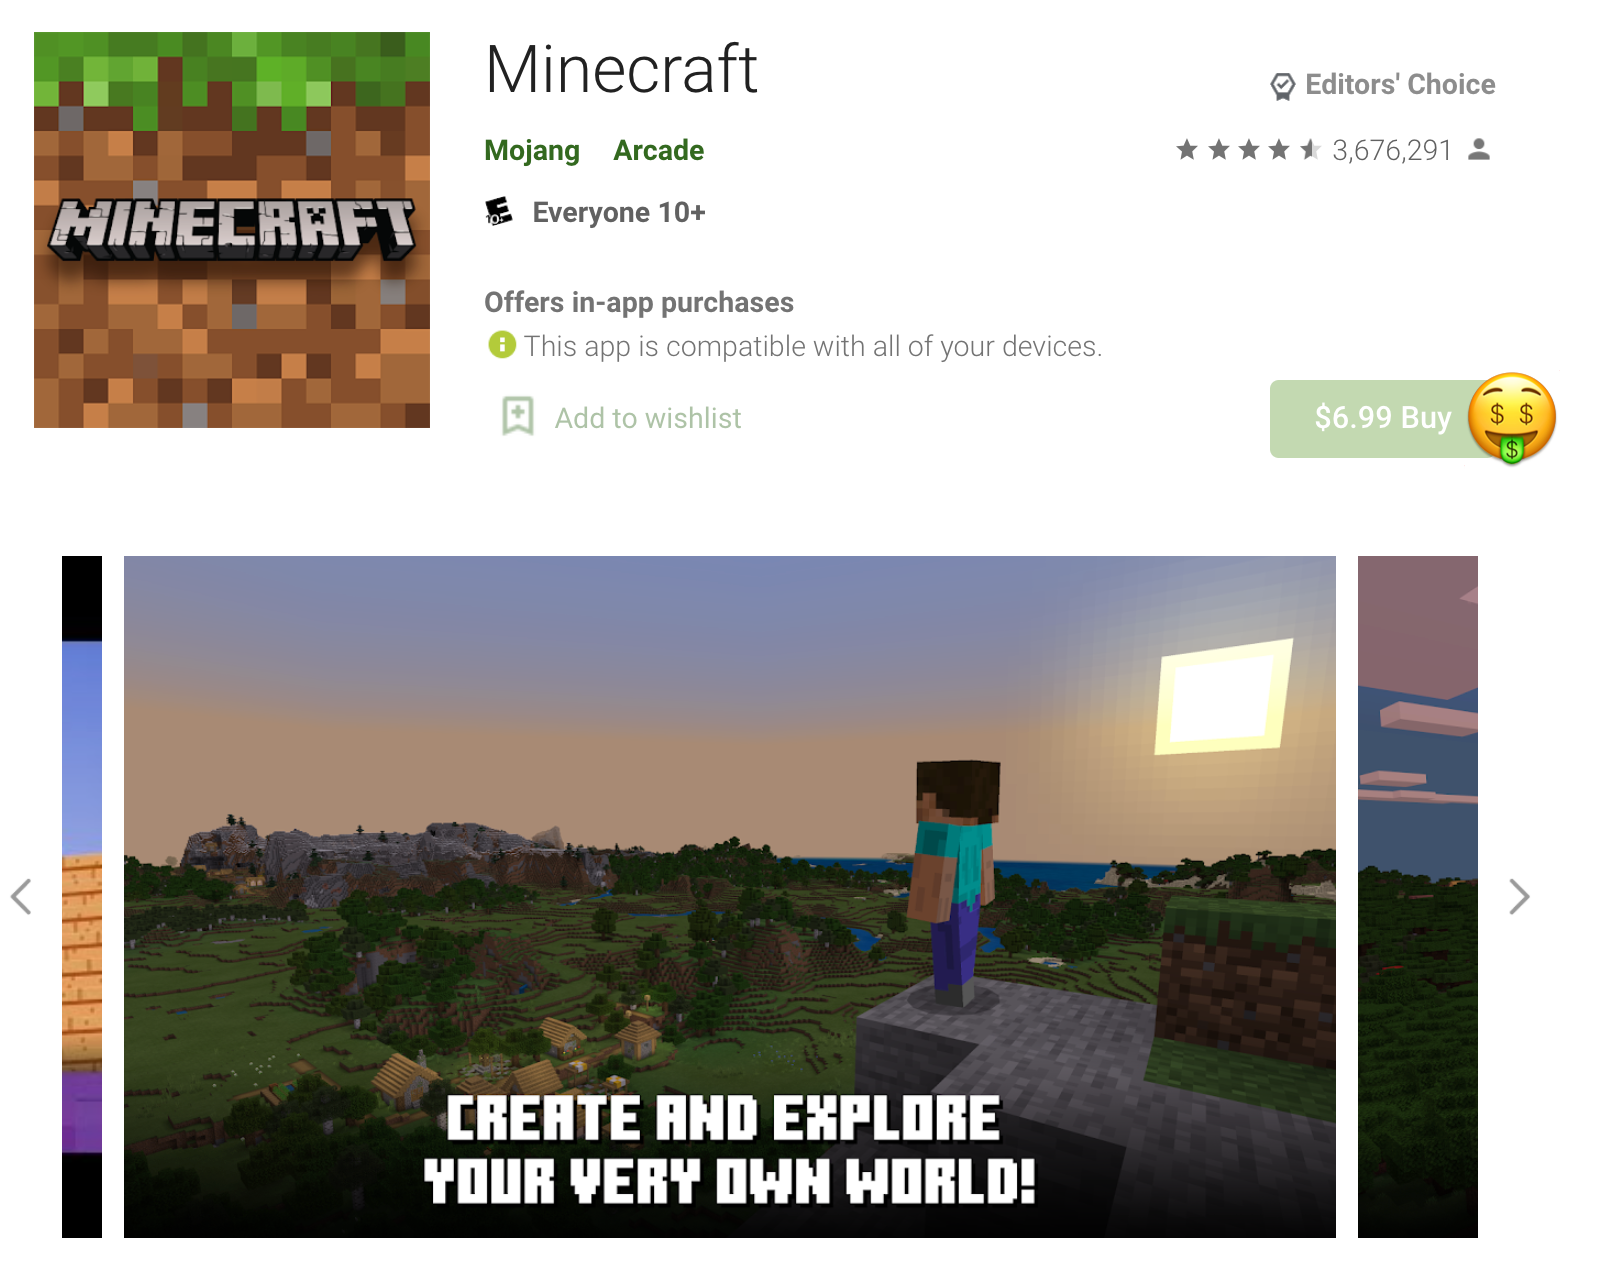


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

If you were to release an app, would you choose to go after a competitive category with many other apps? Or would you target a popular category with a high number of downloads? Or perhaps you can target a category which is both popular but also one where the downloads are spread out among many different apps. That way, even if it’s more difficult to discover among all the other apps, your app has a better chance of getting installed, right? Let’s analyse this with bar charts and scatter plots and figure out which categories are dominating the market.
*We can find the number of different categories like so:*

In [32]:
df_apps_clean.Category.nunique()

33

Which shows us that we there are 33 unique categories.
To calculate the number of apps per category we can use our old friend .value_counts()


In [33]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

**To visualise this data in a bar chart we can use the plotly express (our px) bar() function:**

In [34]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

Based on the number of apps, the Family and Game categories are the most competitive. Releasing yet another app into these categories will make it hard to get noticed.



But what if we look at it from a different perspective? What matters is not just the total number of apps in the category but how often apps are downloaded in that category. This will give us an idea of how popular a category is. First, we have to group all our apps by category and sum the number of installations:

In [35]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

Then we can create a horizontal bar chart, simply by adding the orientation parameter:

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)    

In [36]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h')
 
h_bar.show()

**We can also add a custom title and axis labels like so:**

In [37]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

Now we see that Games and Tools are actually the most popular categories. If we plot the popularity of a category next to the number of apps in that category we can get an idea of how concentrated a category is. Do few apps have most of the downloads or are the downloads spread out over many apps?

### Category Concentration - Downloads vs. Competition





In [38]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})

In [39]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


App     Installs
Category                              
GAME                  910  13858762717
COMMUNICATION         257  11039241530
TOOLS                 719   8099724500
PRODUCTIVITY          301   5788070180
SOCIAL                203   5487841475
PHOTOGRAPHY           263   4649143130
FAMILY               1606   4437554490
VIDEO_PLAYERS         148   3916897200
TRAVEL_AND_LOCAL      187   2894859300
NEWS_AND_MAGAZINES    204   2369110650
ENTERTAINMENT         102   2113660000
BOOKS_AND_REFERENCE   169   1665791655
PERSONALIZATION       298   1532352930
SHOPPING              180   1400331540
HEALTH_AND_FITNESS    243   1134006220
SPORTS                260   1096431465
BUSINESS              262    692018120
LIFESTYLE             297    503611120
MAPS_AND_NAVIGATION   118    503267560
FINANCE               296    455249400
WEATHER                72    361096500
EDUCATION             118    352852000
FOOD_AND_DRINK         94    211677750
DATING                134    140912410
ART_AND_DESIGN         61    114233100
HOUSE_AND_HOME         62     97082000
AUTO_AND_VEHICLES      73     53129800
LIBRARIES_AND_DEMO     64     52083000
COMICS                 54     44931100
MEDICAL               292     39162676
PARENTING              50     31116110
BEAUTY                 42     26916200
EVENTS                 45     15949410

In [40]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

# Extracting Nested Data from a Column

How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [41]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')    

We now have a single column with shape: (8564,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

In [42]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [43]:
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

We see that the majority of apps are free on the Google Play Store. But perhaps some categories have more paid apps than others. Let’s investigate. We can group our data first by Category and then by Type. Then we can add up the number of apps per each type. Using as_index=False we push all the data into columns rather than end up with our Categories as the index.

In [44]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

Category  Type  App
0     ART_AND_DESIGN  Free   58
1     ART_AND_DESIGN  Paid    3
2  AUTO_AND_VEHICLES  Free   72
3  AUTO_AND_VEHICLES  Paid    1
4             BEAUTY  Free   42

Unsurprisingly the biggest categories have the most paid apps. However, there might be some patterns if we put the numbers of a graph!

In [45]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

What we see is that while there are very few paid apps on the Google Play Store, some categories have relatively more paid apps than others, including Personalization, Medical and Weather. So, depending on the category you are targeting, it might make sense to release a paid-for app.



**But this leads to many more questions:**

- How much should you charge? What are other apps charging in that category?

- How much revenue could you make?

- And how many downloads are you potentially giving up because your app is paid?



# Plotly Box Plots: Lost Downloads for Paid Apps



In [46]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Plotly Box Plots: Revenue by App Category



In [47]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()


# How Much Can You Charge? Examine Paid App Pricing Strategies by Category



In [48]:
df_paid_apps.Price.median()

2.99

**The median price for an Android app is $2.99.**

In [49]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()

### Learning Points & Summary
 we looked at how to:

- Pull a random sample from a DataFrame using .sample()

- How to find duplicate entries with .duplicated() and .drop_duplicates()

- How to convert string and object data types into numbers with .to_numeric()

- How to use plotly to generate beautiful pie, donut, and bar charts as well as box and scatter plots

